# Customer Segmentation using K Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_excel(r"D:\AI\data\datasets-1\Wholesale customers data.xlsx")
df.shape

(440, 8)

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# check for duplicates
df.duplicated().sum()

0

In [5]:
# check for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
# check for outliers
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

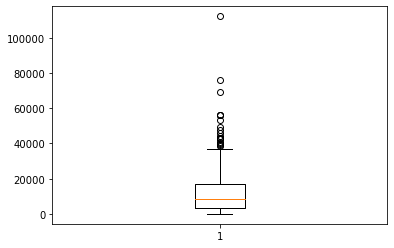

In [7]:
plt.boxplot(df.Fresh)
plt.show()

In [17]:
sum(df.Fresh>40000)

17

In [18]:
17/440

0.038636363636363635

In [19]:
df[df.Fresh<40000].skew()

Channel              0.720980
Region              -1.268727
Fresh                1.075508
Milk                 4.051359
Grocery              3.603252
Frozen               6.410021
Detergents_Paper     3.636540
Delicassen          12.025168
dtype: float64

In [21]:
df.Fresh[df.Fresh>40000] = 40000
df.Fresh.skew()

1.1969376546189294

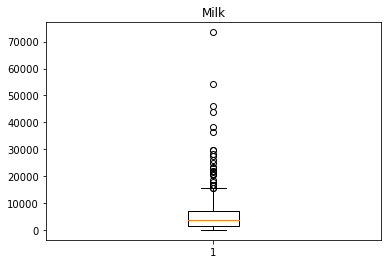

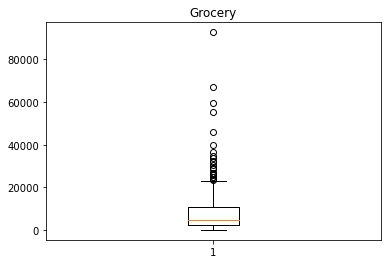

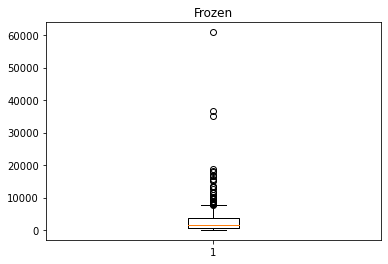

In [23]:
for col in ['Milk','Grocery','Frozen']:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [24]:
df.Milk[df.Milk>25000] = 25000
df.Grocery[df.Grocery>35000] = 35000
df.Frozen[df.Frozen>20000] = 20000
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                1.196938
Milk                 1.885618
Grocery              1.706319
Frozen               2.419955
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

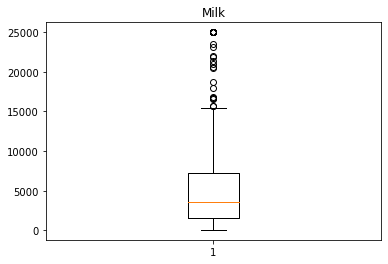

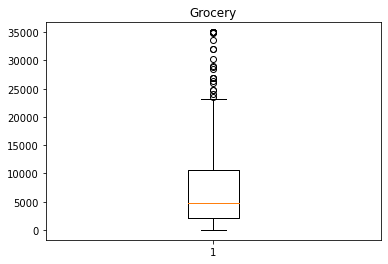

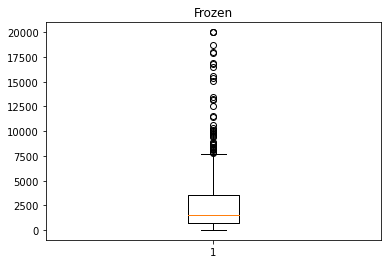

In [25]:
for col in ['Milk','Grocery','Frozen']:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [27]:
df.Milk[df.Milk>20000] = 20000
df.Grocery[df.Grocery>30000] = 30000
df.Frozen[df.Frozen>10000] = 10000
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                1.196938
Milk                 1.498400
Grocery              1.501508
Frozen               1.428338
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

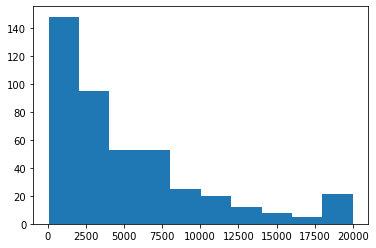

In [30]:
plt.hist(df.Milk)
plt.show()

In [28]:
df2 = df[['Fresh','Milk']]

## Clustering

In [29]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=3)
model.fit(df2)

KMeans(n_clusters=3, random_state=3)

In [32]:

pd.DataFrame(model.cluster_centers_,columns=['Fresh','Milk'])


,Fresh,Milk
0,4110.719008,5966.438017
1,32930.379310,6515.431034
2,15267.278571,3539.757143


In [34]:
# 0th cluster = lowest spenders on Fresh prods, moderate spenders on Milk
# 1st cluster = High Spenders
# 2nd cluster = Moderate spenders on Fresh, lowest spenders on milk

In [33]:
df2['cluster'] = model.predict(df2)
df2

C:\Users\admin\AppData\Local\Temp/ipykernel_12460/371482293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = model.predict(df2)


,Fresh,Milk,cluster
0,12669,9656,2
1,7057,9810,0
2,6353,8808,0
3,13265,1196,2
4,22615,5410,2
...,...,...,...
435,29703,12051,1
436,39228,1431,1
437,14531,15488,2
438,10290,1981,2


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


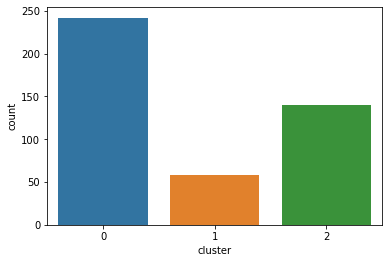

In [35]:
sns.countplot(df2['cluster'])
plt.show()

In [36]:
def label_data(x):
    if x==0:
        return "Low Fresh"
    if x==1:
        return "High spenders"
    else:
        return "low milk"

In [37]:
df2['label'] = df2.cluster.apply(label_data)

C:\Users\admin\AppData\Local\Temp/ipykernel_12460/21955815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'] = df2.cluster.apply(label_data)


In [38]:
df2

,Fresh,Milk,cluster,label
0,12669,9656,2,low milk
1,7057,9810,0,Low Fresh
2,6353,8808,0,Low Fresh
3,13265,1196,2,low milk
4,22615,5410,2,low milk
...,...,...,...,...
435,29703,12051,1,High spenders
436,39228,1431,1,High spenders
437,14531,15488,2,low milk
438,10290,1981,2,low milk


In [39]:
newcust = [[10000,6500]]
model.predict(newcust)

array([0])

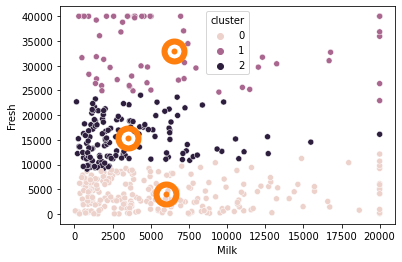

In [50]:
sns.scatterplot(x='Milk',y="Fresh",hue='cluster',data=df2)
plt.scatter(x=model.cluster_centers_[:,1],y=model.cluster_centers_[:,0],linewidths=20)
plt.show()

## K Means for multiple features

In [51]:
df3 = df[['Fresh','Milk','Grocery','Frozen']]
df3.head()

,Fresh,Milk,Grocery,Frozen
0,12669,9656,7561,214
1,7057,9810,9568,1762
2,6353,8808,7684,2405
3,13265,1196,4221,6404
4,22615,5410,7198,3915


In [52]:
model2 = KMeans(n_clusters=3,random_state=3)
model2.fit(df3)

KMeans(n_clusters=3, random_state=3)

In [53]:
pd.DataFrame(model2.cluster_centers_,columns=['Fresh','Milk','Grocery','Frozen'])

,Fresh,Milk,Grocery,Frozen
0,6642.007843,3464.352941,4403.725490,2291.698039
1,26482.045045,4829.153153,6142.027027,4212.693694
2,5526.432432,12133.689189,20186.797297,1620.418919


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


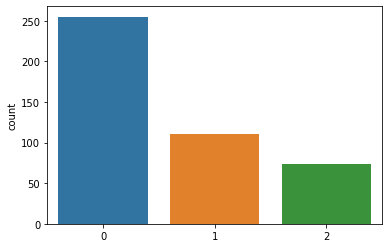

In [55]:
sns.countplot(model2.labels_)
plt.show()

## Finding best value of k

In [59]:
k = np.arange(2,15)
inertia = []
print(k)

for i in k:
    model = KMeans(n_clusters=i,random_state=3)
    model.fit(df3)
    inertia.append(model.inertia_)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14]


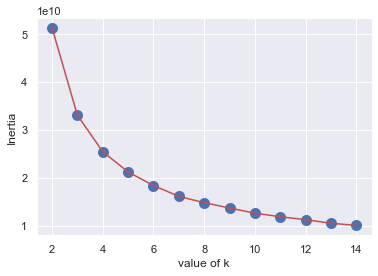

In [61]:
sns.set_theme()
plt.scatter(k,inertia,linewidths=5)
plt.plot(k,inertia,c='r')
plt.xlabel("value of k")
plt.ylabel("Inertia")
plt.show()